In [2]:
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
%matplotlib inline

In [3]:
load_dotenv()

True

In [4]:
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

In [5]:
# Set the ticker
ticker = ["SPY","AGG"]

In [6]:
# Set timeframe to '1D'
timeframe = "1D"

# Set start and end datetimes of 5 years 

start_date = pd.Timestamp("2015-08-07", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2020-08-07", tz="America/New_York").isoformat()

# Get 5 years worth of historical data for SPY,AGG
ticker_data = api.get_barset(
    ticker,
    timeframe,
    start=start_date,
    end=end_date
).df

ticker_data.head()

AGG                                         SPY  \
                             open      high      low   close   volume    open   
time                                                                            
2015-08-07 00:00:00-04:00  109.14  109.2750  109.035  109.21  2041167  208.16   
2015-08-10 00:00:00-04:00  109.15  109.1700  108.920  109.06  1149778  209.28   
2015-08-11 00:00:00-04:00  109.42  109.5765  109.284  109.42  1420907  208.98   
2015-08-12 00:00:00-04:00  109.55  109.7100  109.350  109.36  1468979  207.11   
2015-08-13 00:00:00-04:00  109.36  109.3651  109.110  109.15  1465173  208.73   

                                                              
                             high     low   close     volume  
time                                                          
2015-08-07 00:00:00-04:00  208.34  206.87  207.93   87669782  
2015-08-10 00:00:00-04:00  210.67  209.28  210.58   66755890  
2015-08-11 00:00:00-04:00  209.47  207.76  208.63   88424557  
2015-08-12 00:00:00-04:00  209.14  205.36  208.89  136171450  
2015-08-13 00:00:00-04:00  209.55  208.01  208.63   77197796

In [7]:
# Configure a Monte Carlo simulation to forecast five years cumulative returns
MC_even_dist = MCSimulation(
    portfolio_data = ticker_data,
    num_simulation = 1000,
    num_trading_days = 252*30
)

# Print the simulation input data
MC_even_dist.portfolio_data.head()

AGG                                      \
                             open      high      low   close   volume   
time                                                                    
2015-08-07 00:00:00-04:00  109.14  109.2750  109.035  109.21  2041167   
2015-08-10 00:00:00-04:00  109.15  109.1700  108.920  109.06  1149778   
2015-08-11 00:00:00-04:00  109.42  109.5765  109.284  109.42  1420907   
2015-08-12 00:00:00-04:00  109.55  109.7100  109.350  109.36  1468979   
2015-08-13 00:00:00-04:00  109.36  109.3651  109.110  109.15  1465173   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2015-08-07 00:00:00-04:00          NaN  208.16  208.34  206.87  207.93   
2015-08-10 00:00:00-04:00    -0.001374  209.28  210.67  209.28  210.58   
2015-08-11 00:00:00-04:00     0.003301  208.98  209.47  207.76  208.63   
2015-08-12 00:00:00-04:00    -0.000548  207.11  209.14  205.36  208.89   
2015-08-13 00:00:00-04:00    -0.001920  208.73  209.55  208.01  208.63   

                                                   
                              volume daily_return  
time                                               
2015-08-07 00:00:00-04:00   87669782          NaN  
2015-08-10 00:00:00-04:00   66755890     0.012745  
2015-08-11 00:00:00-04:00   88424557    -0.009260  
2015-08-12 00:00:00-04:00  136171450     0.001246  
2015-08-13 00:00:00-04:00   77197796    -0.001245

In [19]:
MC_even_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.006407,1.003842,0.996197,0.997653,0.997064,0.996976,0.998892,1.009293,0.990924,1.008824,...,0.988907,1.005147,0.997610,1.001839,0.994955,1.012502,1.012848,1.000308,1.000276,1.014738
2,0.992130,1.001801,0.999328,1.006242,1.008566,0.993228,0.994278,1.005274,0.994279,1.009194,...,0.985443,1.010781,1.003778,1.012311,1.004282,1.006379,1.009825,0.999751,1.011363,1.016378
3,0.990064,1.002340,0.988070,1.002430,1.013422,1.002146,1.001644,1.005841,0.996869,0.994994,...,0.984841,1.009578,1.001850,1.012441,1.003685,1.004672,1.010675,1.001768,1.015180,1.024386
4,0.981456,0.996921,0.994870,0.985201,1.022025,0.999460,1.005918,1.006734,0.997977,0.992075,...,0.981743,1.004705,1.003802,1.016701,1.000423,1.002428,1.009926,0.997329,1.013506,1.018867
5,0.984272,0.994004,0.997113,0.988928,1.013545,1.001757,1.009288,1.006860,0.991893,0.991804,...,0.989346,1.001470,1.001879,1.016517,1.000999,1.000139,1.004087,1.001368,1.012085,1.019537
6,0.972413,0.998141,0.995134,0.995814,1.011761,0.990841,1.012163,1.007784,0.999596,0.998879,...,0.984888,1.004535,0.996491,1.003705,0.990612,0.996353,1.007260,1.000587,1.015547,1.016760
7,0.974367,1.000679,0.997863,0.991302,1.015498,0.991945,1.005275,1.007640,0.995358,1.007571,...,0.985541,1.006297,1.002654,1.007494,0.997746,1.005922,1.002528,0.994983,1.022528,1.017332
8,0.973035,1.002700,0.979335,1.004250,1.013992,0.993135,1.013168,1.007440,0.994459,1.012057,...,0.992407,1.010167,1.000622,1.014790,0.998882,1.011109,1.008748,0.992138,1.026844,1.011119
9,0.979343,1.012316,0.982564,1.012111,1.000154,0.991444,1.022690,1.011728,0.990748,1.032508,...,0.986035,1.016892,1.011378,1.010405,1.002287,1.013969,1.010050,1.004549,1.017663,1.011009


Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

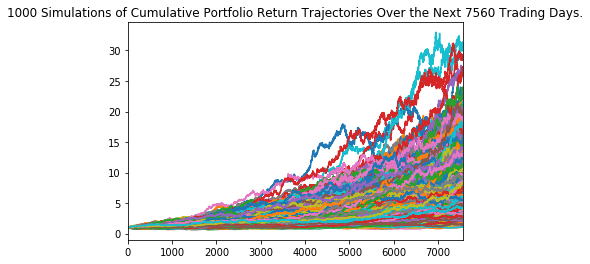

In [8]:
line_plot = MC_even_dist.plot_simulation()

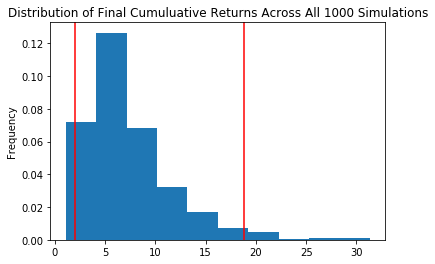

In [9]:
# Plot probability distribution and confidence intervals
dist_plot = MC_even_dist.plot_distribution()

In [10]:
# Fetch summary statistics from the Monte Carlo simulation results
even_tbl = MC_even_dist.summarize_cumulative_return()

# Print summary statistics
print(even_tbl)

count           1000.000000
mean               7.264999
std                4.254375
min                1.073016
25%                4.365484
50%                6.185458
75%                9.018241
max               31.352019
95% CI Lower       2.035058
95% CI Upper      18.814314
Name: 7560, dtype: float64


In [13]:
#Set initial Investment
investment=60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000 
even_ci_lower = round(even_tbl[8]*investment,2)
even_ci_upper = round(even_tbl[9]*investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of $60,000 in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${even_ci_lower} and ${even_ci_upper}.")

There is a 95% chance that an initial investment of $60,000 in the portfolio over the next 5 years will end within in the range of $122103.47 and $1128858.83.
